# Getting Started - Simple Linear Regression with R
Revision 1.0

## Simple Linear Regression warmup with lm() with mtcars dataset
**Web Resources**
- https://towardsdatascience.com/understanding-linear-regression-output-in-r-7a9cbda948b3
- https://www.statology.org/standard-error-of-regression-slope/
- https://people.duke.edu/~rnau/mathreg.htm
- https://en.wikipedia.org/wiki/Simple_linear_regression#Normality_assumption
- https://www.r-tutor.com/elementary-statistics/simple-linear-regression/coefficient-determination
- https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars

In [1]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [2]:
linreg.fit <- lm(mtcars$hp~mtcars$mpg)
summary(linreg.fit)


Call:
lm(formula = mtcars$hp ~ mtcars$mpg)

Residuals:
   Min     1Q Median     3Q    Max 
-59.26 -28.93 -13.45  25.65 143.36 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   324.08      27.43  11.813 8.25e-13 ***
mtcars$mpg     -8.83       1.31  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.95 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


In [3]:
# Residuals Computing
summary(mtcars$hp - linreg.fit$fitted.values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -59.26  -28.93  -13.45    0.00   25.65  143.36 

In [4]:
summary(mtcars$hp - predict(linreg.fit, data.frame(mtcars$mpg)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -59.26  -28.93  -13.45    0.00   25.65  143.36 

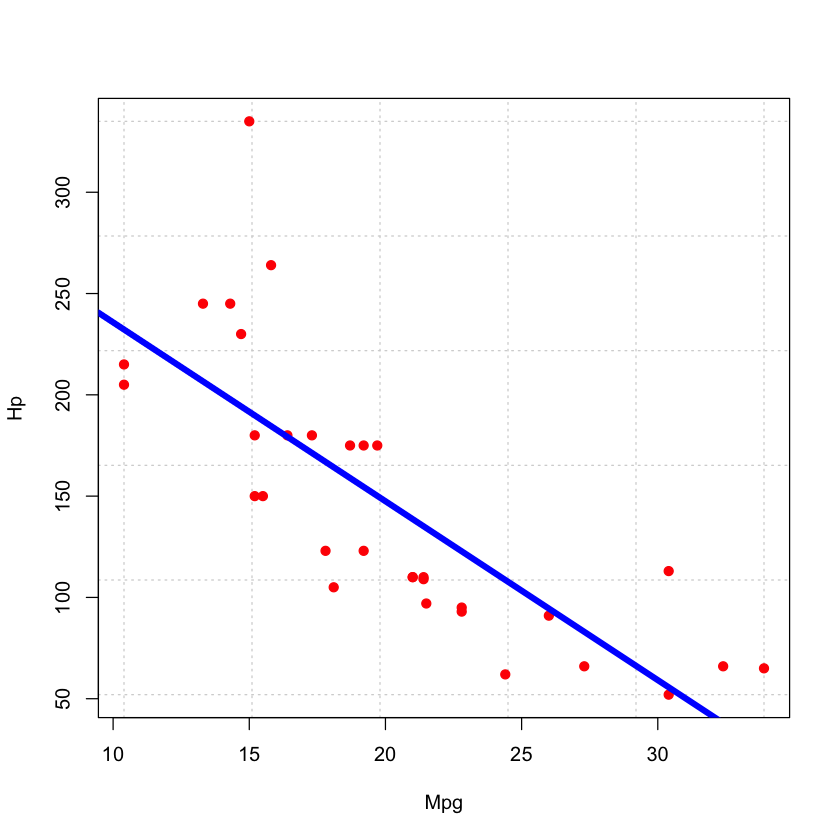

In [5]:
plot(mtcars$mpg, mtcars$hp, col = 'red', pch=19, 
     first.panel = grid(), xlab="Mpg", ylab = "Hp")
abline(linreg.fit, col = 'blue', lwd = 5)

In [6]:
linreg.fit$coefficients # Its the sames as #coef(linreg.fit)

(Intercept)  mtcars$mpg 
 324.082314   -8.829731

In [7]:
predict(linreg.fit, data.frame(mtcars$mpg), interval='confidence')

,fit,lwr,upr
1,138.65796,122.607235,154.70869
2,138.65796,122.607235,154.70869
3,122.76445,105.322560,140.20633
4,135.12607,118.878786,151.37336
5,158.96634,142.670840,175.26185
6,164.26418,147.529329,180.99904
7,197.81716,175.645923,219.98840
8,108.63688,89.026962,128.24679
9,122.76445,105.322560,140.20633
10,154.55148,138.508273,170.59469


**Standard Error Computing in Linear Regression**

$$
s(b_1) = \sqrt{
\frac{1}{n-2} \frac{\sum{(y_i - \hat{y_i})^2}}{\sum{(x_i - \overline{x})^2}}
}
$$

In [8]:
std.error <- function(y, yhat, x) {
    n <- length(x)
    sqrt(
        1/(n-2)* sum((y - yhat)^2)/sum((x - mean(x))^2)
    )
}
# The standard error for the slope is given by
slope.stderr <- std.error(mtcars$hp, linreg.fit$fitted.values, mtcars$mpg)
slope.stderr

[1] 1.309585

In [9]:
# t-statistic = coefficient estimate / standard error
tstat.slope <- linreg.fit$coefficients[[2]]/slope.stderr
tstat.slope

[1] -6.742389

In [10]:
# P value for t-statistic for slope
2*pt(abs(tstat.slope), nrow(mtcars) - 2, lower.tail = FALSE)

[1] 1.787835e-07

In [11]:
# We are 95% confident that the actual slope is between:
c(lwr.slope = linreg.fit$coefficients[[2]] - abs(qt(0.025, nrow(mtcars)-2))*slope.stderr,
  upr.slope = linreg.fit$coefficients[[2]] + abs(qt(0.025, nrow(mtcars)-2))*slope.stderr)

lwr.slope  upr.slope 
-11.504260  -6.155202

$$
s(b_0) = \sqrt{\frac{1}{n}\sum{x_i^2}}
$$

In [12]:
intercept.stderr <- slope.stderr*sqrt(1/length(mtcars$mpg)*sum(mtcars$mpg^2))
intercept.stderr

[1] 27.4333

In [13]:
tstat.intercept <- linreg.fit$coefficients[[1]]/intercept.stderr
tstat.intercept

[1] 11.81347

In [14]:
# P value for t-statistic for intercept
2*pt(abs(tstat.intercept), nrow(mtcars) - 2, lower.tail = FALSE)

[1] 8.245456e-13

## Simple Linear Regression warmup through linear algebra with mtcars dataset

In [54]:
# Pseudo Inverse compute function
pseudo.inv <- function(M){
  solve(t(M)%*%M)%*%t(M)
}

# Fit Model for simple linear regresion
linear.model <- function(t) {
  c(t, 1)
}

# Sum of square through dot product
sum.squares <- function(v){
    t(matrix(v)) %*% matrix(v)
}

In [16]:
A <- t(sapply(mtcars$mpg, linear.model)) # Measurements matrix
linear.coefs <- pseudo.inv(A)%*%matrix(mtcars$hp) 
rownames(linear.coefs) <- c("slope", "intercept")
linear.coefs

slope,-8.829731
intercept,324.082314


In [26]:
y.hat <- linear.coefs[1]*mtcars$mpg + linear.coefs[2]
summary(mtcars$hp - y.hat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -59.26  -28.93  -13.45    0.00   25.65  143.36 

In [79]:
SS.total <- sum.squares(mtcars$hp - mean(mtcars$hp)) # Is the same as sum((mtcars$hp - mean(mtcars$hp))^2)
SS.err   <- sum.squares(mtcars$hp - y.hat)
SS.reg   <- SS.total - SS.err
SS.x     <- sum.squares(mtcars$mpg - mean(mtcars$mpg))

In [64]:
slope.stderr <- sqrt(1/(nrow(mtcars) - 2)*(SS.err/SS.x))
slope.stderr

1.309585


In [69]:
# t-statistic = coefficient estimate / standard error
tstat.slope <- linear.coefs[1]/slope.stderr
tstat.slope

-6.742389


In [70]:
# P value for t-statistic for slope
2*pt(abs(tstat.slope), nrow(mtcars) - 2, lower.tail = FALSE)

1.787835e-07


In [71]:
# We are 95% confident that the actual slope is between:
c(lwr.slope = linear.coefs[1] - abs(qt(0.025, nrow(mtcars)-2))*slope.stderr,
  upr.slope = linear.coefs[1] + abs(qt(0.025, nrow(mtcars)-2))*slope.stderr)

lwr.slope  upr.slope 
-11.504260  -6.155202

In [76]:
r.squared <- sum.squares(y.hat - mean(mtcars$hp))/SS.total # Is the same as SS.reg/SS.total = explained var/total var
r.squared

0.6024373


In [89]:
MS.reg <- SS.reg/1                   # Mean squares regression for one predictor
MS.res <- SS.err/(nrow(mtcars) - 2)  # Mean squares residuals
f.stat <- MS.reg/MS.res              # The ratio of explained to unexplained variability
f.stat

45.4598


In [92]:
pf(f.stat, 1, nrow(mtcars) - 2, lower.tail = FALSE) # df1 = one predictor

1.787835e-07
